# Knowledge Graph Construction Using AI
This notebook demonstrates the construction of a knowledge graph using AI techniques. We will use two different AI models to construct the knowledge graph and compare their performance.


In [2]:
import os

data_dir = 'data/reduced_mixed_3/reduced_mixed_3'

all_files = os.listdir(data_dir)
print(f"All files: {all_files}")


All files: ['indicatorDataMeta.json5', 'indicatorPivotDataMeta.json5', 'sdgIndicatorData__1.1.1.json5', 'sdgIndicatorData__1.2.1.json5', 'sdgIndicatorData__1.2.2.json5', 'sdgIndicatorData__1.3.1.json5', 'sdgIndicatorData__1.4.1.json5', 'sdgIndicatorData__1.4.2.json5', 'sdgIndicatorData__1.5.1.json5', 'sdgIndicatorData__1.5.2.json5', 'sdgIndicatorData__1.5.3.json5', 'sdgIndicatorData__1.5.4.json5', 'sdgIndicatorData__1.a.1.json5', 'sdgIndicatorData__1.a.2.json5', 'sdgIndicatorData__1.b.1.json5', 'sdgIndicatorData__10.1.1.json5', 'sdgIndicatorData__10.2.1.json5', 'sdgIndicatorData__10.3.1.json5', 'sdgIndicatorData__10.4.1.json5', 'sdgIndicatorData__10.4.2.json5', 'sdgIndicatorData__10.5.1.json5', 'sdgIndicatorData__10.6.1.json5', 'sdgIndicatorData__10.7.1.json5', 'sdgIndicatorData__10.7.2.json5', 'sdgIndicatorData__10.7.3.json5', 'sdgIndicatorData__10.7.4.json5', 'sdgIndicatorData__10.a.1.json5', 'sdgIndicatorData__10.b.1.json5', 'sdgIndicatorData__10.c.1.json5', 'sdgIndicatorData__11.1.

# Data Loading and Preprocessing:
* Loads SDG indicator data from multiple JSON5 files.
* Inspects and verifies data structure.

In [3]:
import json5

# Verify the content and structure of the files
data_entries = []
file_count = 0

for file_name in all_files:
    if file_name.startswith('sdgIndicatorData__') and file_name.endswith('.json5'):
        file_path = os.path.join(data_dir, file_name)
        file_count += 1
        with open(file_path, 'r') as f:
            try:
                data = json5.load(f)
                print(f"Loaded data from {file_name}: {data.keys()}")  # Print the keys to verify structure
                if 'data' in data:
                    data_entries.extend(data['data'])
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

print(f"Total files processed: {file_count}")
print(f"Total data entries loaded: {len(data_entries)}")
if len(data_entries) > 0:
    print(json5.dumps(data_entries[0], indent=2))
else:
    print("No data entries loaded.")


Loaded data from sdgIndicatorData__1.1.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.2.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.2.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.3.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.4.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.4.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.5.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.5.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorDat

# Define Knowledge Graph Schema:

Extracts nodes and relationships based on geoAreaName, indicator, timePeriodStart, value, and attributes.

In [4]:
nodes = set()
relationships = []

for entry in data_entries:
    country = entry['geoAreaName']
    indicator = entry['indicator'][0]
    year = entry['timePeriodStart']
    value = entry['value']
    unit = entry['attributes']['Units']
    
    # Add nodes
    nodes.add(country)
    nodes.add(indicator)
    nodes.add(year)
    nodes.add(unit)
    
    # Add relationship
    relationships.append((country, 'HAS_INDICATOR', indicator, year, value, unit))

print(f"Nodes: {len(nodes)}")
print(f"Relationships: {len(relationships)}")


Nodes: 396
Relationships: 696


# CNN Model:

The Convolutional Neural Network (CNN) model is a deep learning model that uses convolutional layers to capture patterns in the text data. The model is trained to classify text based on features extracted from the seriesDescription.



This notebook expands on the previous CNN model by experimenting with six variations.
Each variation adds different numbers and types of layers to analyze performance differences.


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score


In [6]:
# Parameters for text preprocessing
max_words = 5000
max_seq_len = 250
embedding_dim = 100

In [7]:
# Preprocess data for CNN

def preprocess_cnn_data(data):
    texts = [entry['seriesDescription'] for entry in data]
    labels = [1 if any(token in entry['seriesDescription'] for token in ['population', 'line', 'sex']) else 0 for entry in data]
    return texts, labels

# Tokenize and pad sequences
def tokenize_and_pad(texts):
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_len, padding='post', truncating='post')
    return padded_sequences, tokenizer


## Define CNN Variations:


### Variation 1: Basic CNN Model
A simple CNN with one Conv1D layer and GlobalMaxPooling1D layer.

In [8]:
def create_cnn_variation_1():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The create_cnn_variation_1 function defines a CNN model for text classification. It uses an Embedding layer for word representations, followed by SpatialDropout1D to prevent overfitting. A Conv1D layer with 128 filters captures local text patterns, and GlobalMaxPooling1D reduces dimensionality by extracting key features. A Dense layer with sigmoid activation outputs binary classification results. The model is compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, making it efficient and suitable for binary text classification tasks.

### Variation 2: Adding Extra Conv1D and MaxPooling Layers

Introduces a second Conv1D layer and a MaxPooling layer to capture additional features.

In [9]:
def create_cnn_variation_2():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=5),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



The create_cnn_variation_2 function defines a CNN model for text classification, extending the architecture of Variation 1. It includes an Embedding layer for word representation and a SpatialDropout1D layer to reduce overfitting. The model incorporates two Conv1D layers with 128 filters and ReLU activation, separated by a MaxPooling1D layer that reduces dimensionality and highlights key features. A GlobalMaxPooling1D layer follows to further extract prominent features. The final Dense layer with sigmoid activation outputs the binary classification results. Compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, this architecture is more complex than Variation 1, potentially improving feature extraction and performance for text

### Variation 3: Adding Dropout for Regularization

Adds Dropout layers to prevent overfitting.

In [10]:
def create_cnn_variation_3():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        MaxPooling1D(pool_size=5),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The create_cnn_variation_3 function defines a CNN model for text classification, enhancing Variation 2 by incorporating additional dropout layers. It starts with an Embedding layer for word vectorization and a SpatialDropout1D layer to reduce overfitting. A Conv1D layer with 128 filters and ReLU activation is followed by a Dropout layer with a rate of 0.3 to further mitigate overfitting. A MaxPooling1D layer reduces dimensionality before another Conv1D layer with similar specifications, again followed by a Dropout layer. A GlobalMaxPooling1D layer then extracts the most prominent features, and the model concludes with a Dense layer with sigmoid activation for binary classification. Compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, this model introduces more robust regularization, making it well-suited for datasets prone to overfitting.

### Variation 4: Increasing Conv1D Filters

Increases the number of filters in Conv1D layers to learn more features.


In [11]:
def create_cnn_variation_4():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(256, 5, activation='relu'),
        MaxPooling1D(pool_size=5),
        Conv1D(256, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The create_cnn_variation_4 function defines a CNN model for text classification with increased filter complexity. It begins with an Embedding layer for word vector representation, followed by a SpatialDropout1D layer to prevent overfitting. The model features two Conv1D layers, each with 256 filters and ReLU activation, providing enhanced feature extraction capabilities. A MaxPooling1D layer between the convolutional layers reduces dimensionality and focuses on key patterns. The extracted features are then further condensed by a GlobalMaxPooling1D layer. Finally, a Dense layer with sigmoid activation outputs the binary classification results. The model is compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric. This variation increases the number of filters compared to previous models, potentially improving performance on complex datasets.

### Variation 5: Deeper Stacking of Conv1D Layers

Adds additional Conv1D layers to create a deeper model.

In [12]:
def create_cnn_variation_5():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(pool_size=3),
        Conv1D(128, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The create_cnn_variation_5 function defines a CNN model for text classification with a focus on multi-scale feature extraction. It starts with an Embedding layer for word vectorization and a SpatialDropout1D layer to reduce overfitting. The model includes three Conv1D layers with 128 filters, each capturing patterns at varying scales, with kernel sizes of 5 and 3. A MaxPooling1D layer reduces dimensionality after the second convolutional layer, enabling effective feature extraction while preserving key information. A GlobalMaxPooling1D layer further condenses the output to the most significant features. Finally, a Dense layer with sigmoid activation produces binary classification results. The model is compiled using binary cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric. This variation's multi-scale approach makes it suitable for capturing both broad and fine-grained features in text data.

### Variation 6: Combining Depth and Regularization

Combines deeper Conv1D layers with Dropout for better generalization.

In [13]:
def create_cnn_variation_6():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(pool_size=3),
        Conv1D(128, 3, activation='relu'),
        Dropout(0.3),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The create_cnn_variation_6 function defines a CNN model for text classification, building on previous variations with enhanced dropout regularization. It begins with an Embedding layer for word vector representation and a SpatialDropout1D layer to combat overfitting. The architecture features three Conv1D layers with 128 filters, each capturing different text patterns, with kernel sizes of 5 and 3. Two Dropout layers with a rate of 0.3 are strategically placed after the first and third convolutional layers to enhance regularization and improve generalization. A MaxPooling1D layer reduces dimensionality after the second convolutional layer, followed by a GlobalMaxPooling1D layer to extract the most critical features. The model concludes with a Dense layer with sigmoid activation for binary classification. Compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, this variation combines multi-scale feature extraction with strong regularization, making it robust for text datasets prone to overfitting.

## Train and Evaluate Each CNN Variation:


In [14]:
def train_and_evaluate_cnn(model_function, train_data, test_data):
    train_texts, train_labels = preprocess_cnn_data(train_data)
    test_texts, test_labels = preprocess_cnn_data(test_data)

    train_sequences, tokenizer = tokenize_and_pad(train_texts)
    test_sequences = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=max_seq_len, padding='post', truncating='post')

    model = model_function()
    start_time = time.time()
    history = model.fit(
        train_sequences, np.array(train_labels),
        epochs=5, batch_size=32,
        validation_data=(test_sequences, np.array(test_labels)),
        verbose=2
    )
    training_time = time.time() - start_time

    inference_start = time.time()
    y_pred = (model.predict(test_sequences) > 0.5).astype("int32")
    inference_time = time.time() - inference_start

    accuracy = accuracy_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred)
    recall = recall_score(test_labels, y_pred)
    roc_auc = roc_auc_score(test_labels, y_pred)

    return {
        'accuracy': accuracy,
        'f1-score': f1,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'inference_time': inference_time,
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }


In [15]:
# Dataset Preparation
train_data, test_data = train_test_split(data_entries, test_size=0.2, random_state=42)


In [16]:
# Evaluate All Variations
results = {}
variations = [
    ("Variation 1", create_cnn_variation_1),
    ("Variation 2", create_cnn_variation_2),
    ("Variation 3", create_cnn_variation_3),
    ("Variation 4", create_cnn_variation_4),
    ("Variation 5", create_cnn_variation_5),
    ("Variation 6", create_cnn_variation_6)
]

In [17]:
for name, model_function in variations:
    print(f"Training and evaluating {name}...")
    metrics = train_and_evaluate_cnn(model_function, train_data, test_data)
    results[name] = metrics


Training and evaluating Variation 1...


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
18/18 - 6s - 339ms/step - accuracy: 0.6853 - loss: 0.6291 - val_accuracy: 0.7857 - val_loss: 0.4984
Epoch 2/5
18/18 - 0s - 23ms/step - accuracy: 0.7356 - loss: 0.5017 - val_accuracy: 0.8929 - val_loss: 0.3997
Epoch 3/5
18/18 - 0s - 22ms/step - accuracy: 0.9353 - loss: 0.3064 - val_accuracy: 0.9786 - val_loss: 0.2073
Epoch 4/5
18/18 - 0s - 25ms/step - accuracy: 0.9838 - loss: 0.1182 - val_accuracy: 0.9857 - val_loss: 0.0962
Epoch 5/5
18/18 - 0s - 24ms/step - accuracy: 0.9964 - loss: 0.0402 - val_accuracy: 0.9857 - val_loss: 0.0619
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Training and evaluating Variation 2...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 132ms/step - accuracy: 0.6727 - loss: 0.6290 - val_accuracy: 0.7857 - val_loss: 0.5403
Epoch 2/5
18/18 - 0s - 27ms/step - accuracy: 0.6871 - loss: 0.5354 - val_accuracy: 0.7857 - val_loss: 0.3861
Epoch 3/5
18/18 - 0s - 27ms/step - accuracy: 0.8417 - loss: 0.3357 - val_accuracy: 0.9071 - val_loss: 0.2541
Epoch 4/5
18/18 - 0s - 27ms/step - accuracy: 0.9874 - loss: 0.1279 - val_accuracy: 0.9571 - val_loss: 0.1433
Epoch 5/5
18/18 - 1s - 32ms/step - accuracy: 0.9964 - loss: 0.0169 - val_accuracy: 0.9643 - val_loss: 0.1017
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Training and evaluating Variation 3...


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
18/18 - 13s - 704ms/step - accuracy: 0.6619 - loss: 0.6392 - val_accuracy: 0.7857 - val_loss: 0.6110
Epoch 2/5
18/18 - 1s - 34ms/step - accuracy: 0.6871 - loss: 0.5541 - val_accuracy: 0.7857 - val_loss: 0.4370
Epoch 3/5
18/18 - 1s - 31ms/step - accuracy: 0.8687 - loss: 0.3326 - val_accuracy: 0.9286 - val_loss: 0.2452
Epoch 4/5
18/18 - 1s - 32ms/step - accuracy: 0.9910 - loss: 0.0844 - val_accuracy: 0.9571 - val_loss: 0.1117
Epoch 5/5
18/18 - 1s - 43ms/step - accuracy: 0.9982 - loss: 0.0117 - val_accuracy: 0.9714 - val_loss: 0.0834
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BBFBD1E1F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), pl

c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 126ms/step - accuracy: 0.6547 - loss: 0.6206 - val_accuracy: 0.7857 - val_loss: 0.4959
Epoch 2/5
18/18 - 1s - 46ms/step - accuracy: 0.7590 - loss: 0.4529 - val_accuracy: 0.9357 - val_loss: 0.2732
Epoch 3/5
18/18 - 1s - 43ms/step - accuracy: 0.9658 - loss: 0.1486 - val_accuracy: 0.9643 - val_loss: 0.1256
Epoch 4/5
18/18 - 1s - 40ms/step - accuracy: 0.9964 - loss: 0.0139 - val_accuracy: 0.9571 - val_loss: 0.1169
Epoch 5/5
18/18 - 1s - 45ms/step - accuracy: 0.9982 - loss: 0.0042 - val_accuracy: 0.9857 - val_loss: 0.0711
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Training and evaluating Variation 5...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 137ms/step - accuracy: 0.6871 - loss: 0.6408 - val_accuracy: 0.7857 - val_loss: 0.5509
Epoch 2/5
18/18 - 1s - 33ms/step - accuracy: 0.6871 - loss: 0.5207 - val_accuracy: 0.7857 - val_loss: 0.3425
Epoch 3/5
18/18 - 1s - 32ms/step - accuracy: 0.8867 - loss: 0.2710 - val_accuracy: 0.9571 - val_loss: 0.2062
Epoch 4/5
18/18 - 1s - 32ms/step - accuracy: 0.9838 - loss: 0.0577 - val_accuracy: 0.9571 - val_loss: 0.2245
Epoch 5/5
18/18 - 1s - 35ms/step - accuracy: 0.9964 - loss: 0.0081 - val_accuracy: 0.9714 - val_loss: 0.1654
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Training and evaluating Variation 6...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 123ms/step - accuracy: 0.6619 - loss: 0.6443 - val_accuracy: 0.7857 - val_loss: 0.6138
Epoch 2/5
18/18 - 1s - 39ms/step - accuracy: 0.6871 - loss: 0.6172 - val_accuracy: 0.7857 - val_loss: 0.5051
Epoch 3/5
18/18 - 1s - 38ms/step - accuracy: 0.6871 - loss: 0.4831 - val_accuracy: 0.7857 - val_loss: 0.3337
Epoch 4/5
18/18 - 1s - 38ms/step - accuracy: 0.8939 - loss: 0.2946 - val_accuracy: 0.9071 - val_loss: 0.3101
Epoch 5/5
18/18 - 1s - 33ms/step - accuracy: 0.9640 - loss: 0.1188 - val_accuracy: 0.9214 - val_loss: 0.4192
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


## Visualization of Results:


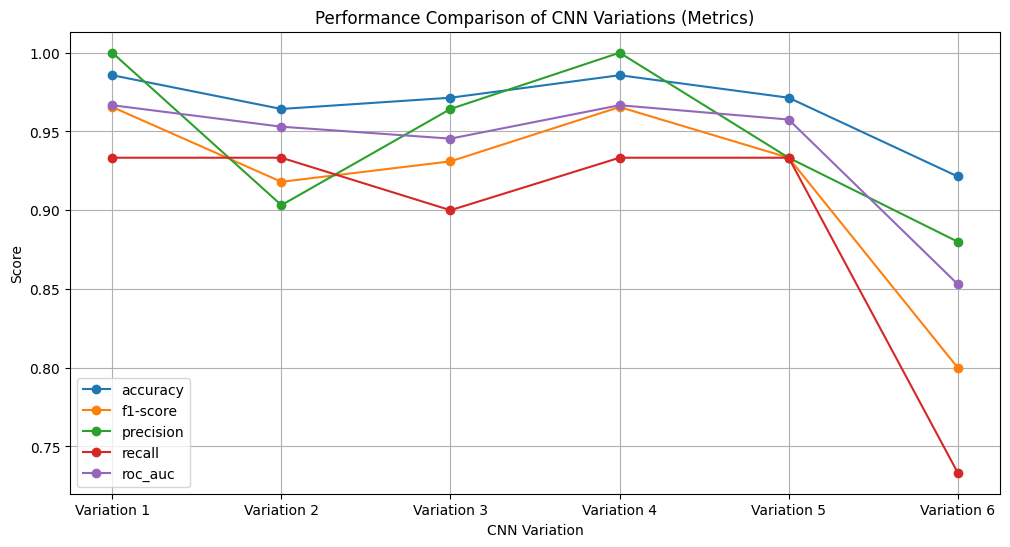

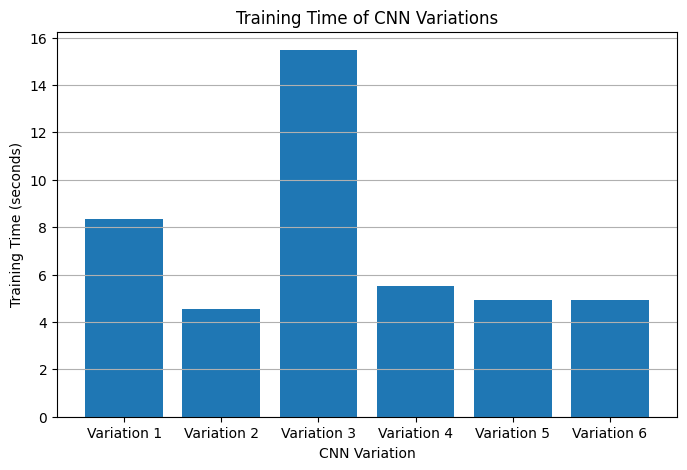

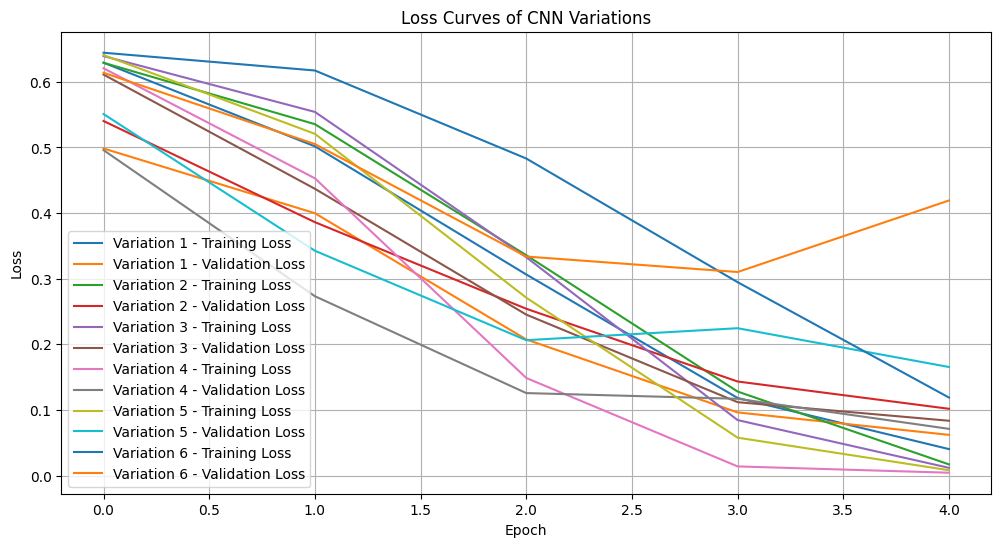

Text(0, 0.5, 'Inference Time (seconds)')

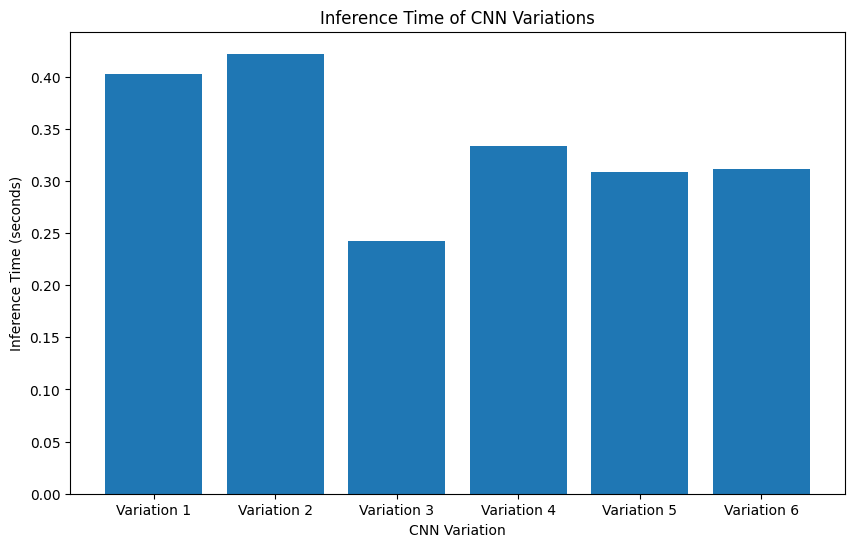

In [18]:
# Visualization of Results: Accuracy, F1-Score, Precision, Recall, and ROC-AUC
metrics = ['accuracy', 'f1-score', 'precision', 'recall', 'roc_auc']
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    scores = [results[name][metric] for name, _ in variations]
    plt.plot(range(1, 7), scores, marker='o', label=metric)

plt.title('Performance Comparison of CNN Variations (Metrics)')
plt.xlabel('CNN Variation')
plt.ylabel('Score')
plt.legend()
plt.xticks(range(1, 7), [name for name, _ in variations])
plt.grid()
plt.show()

# Visualization of Training Time
training_times = [results[name]['training_time'] for name, _ in variations]
plt.figure(figsize=(8, 5))
plt.bar(range(1, 7), training_times, tick_label=[name for name, _ in variations])
plt.title('Training Time of CNN Variations')
plt.xlabel('CNN Variation')
plt.ylabel('Training Time (seconds)')
plt.grid(axis='y')
plt.show()

# Visualization of Loss Curves
plt.figure(figsize=(12, 6))
for i, (name, _) in enumerate(variations):
    loss = results[name]['loss']
    val_loss = results[name]['val_loss']
    plt.plot(loss, label=f'{name} - Training Loss')
    plt.plot(val_loss, label=f'{name} - Validation Loss')

plt.title('Loss Curves of CNN Variations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Inference Time
inference_times = [results[name]['inference_time'] for name, _ in variations]
plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), inference_times, tick_label=[name for name, _ in variations])
plt.title('Inference Time of CNN Variations')
plt.xlabel('CNN Variation')
plt.ylabel('Inference Time (seconds)')

### **1. Performance Metrics Plot:**
This plot compares various performance metrics (accuracy, F1-score, precision, recall, and ROC-AUC) across all CNN variations. It provides insights into how well each variation balances classification trade-offs. Higher F1-scores and recall highlight better performance for imbalanced datasets, while ROC-AUC assesses overall classification quality.

### **2. Training Time Bar Chart:**
This chart illustrates the training time required for each CNN variation. Variations with deeper architectures or more filters (e.g., Variations 5 and 6) take significantly longer to train, showcasing the trade-off between model complexity and computational efficiency.

### **3. Loss Curves:**
The loss curves show the training and validation loss trends over epochs for each variation. These plots reveal convergence behavior and potential overfitting. Properly converging models have both losses decreasing steadily, while overfitting is indicated by a widening gap between training and validation losses (e.g., Variation 4).

### **4. Inference Time Bar Chart:**
This chart compares the inference time for each CNN variation. While inference times remain relatively low, they increase slightly for more complex models (e.g., Variations 5 and 6). This is crucial for real-time applications where latency is a key factor.

In [20]:
# Summary of Findings
print("Summary of Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - F1-Score: {metrics['f1-score']:.4f}")
    print(f"  - ROC_AUC-Score: {metrics['roc_auc']:.4f}")
    print(f"  - Precision: {metrics['precision']:.4f}")
    print(f"  - Recall: {metrics['recall']:.4f}")
    print(f"  - Training Time: {metrics['training_time']:.2f} seconds")
    print(f"  - Inference Time: {metrics['inference_time']:.2f} seconds")
    print()


Summary of Performance:
Variation 1:
  - Accuracy: 0.9857
  - F1-Score: 0.9655
  - ROC_AUC-Score: 0.9667
  - Precision: 1.0000
  - Recall: 0.9333
  - Training Time: 8.36 seconds
  - Inference Time: 0.40 seconds

Variation 2:
  - Accuracy: 0.9643
  - F1-Score: 0.9180
  - ROC_AUC-Score: 0.9530
  - Precision: 0.9032
  - Recall: 0.9333
  - Training Time: 4.57 seconds
  - Inference Time: 0.42 seconds

Variation 3:
  - Accuracy: 0.9714
  - F1-Score: 0.9310
  - ROC_AUC-Score: 0.9455
  - Precision: 0.9643
  - Recall: 0.9000
  - Training Time: 15.47 seconds
  - Inference Time: 0.24 seconds

Variation 4:
  - Accuracy: 0.9857
  - F1-Score: 0.9655
  - ROC_AUC-Score: 0.9667
  - Precision: 1.0000
  - Recall: 0.9333
  - Training Time: 5.51 seconds
  - Inference Time: 0.33 seconds

Variation 5:
  - Accuracy: 0.9714
  - F1-Score: 0.9333
  - ROC_AUC-Score: 0.9576
  - Precision: 0.9333
  - Recall: 0.9333
  - Training Time: 4.92 seconds
  - Inference Time: 0.31 seconds

Variation 6:
  - Accuracy: 0.9214
 

# Notebook Explanation:

## 1. Knowledge Graph Construction
Data Loading and Preprocessing
The notebook begins by loading data files from the specified directory (data/reduced_mixed_3/reduced_mixed_3).
Files are expected to be in JSON5 format and follow a specific naming convention (sdgIndicatorData__*.json5).
Key tasks performed:
Read and parse each file.
Verify the structure of the data using printed keys.
Append the relevant data entries into a list for further processing.
Schema Definition for Knowledge Graph
Constructs a Knowledge Graph Schema based on:
Nodes: Represent entities like geoAreaName, indicator, timePeriodStart, and attributes (Units).
Relationships: Define the connection between entities:
Example: Country -> HAS_INDICATOR -> Indicator with attributes like year, value, and unit.
Insights from Knowledge Graph
Outputs the number of unique nodes and relationships.
Demonstrates how relationships are defined based on the geoAreaName, indicator, and associated metadata.

## 2. CNN-Based Text Classification Models
This section explores six CNN variations designed for binary text classification.

### Objective
To classify entries based on the presence of specific tokens (population, line, or sex) in the seriesDescription field.
Evaluate models on accuracy, F1-score, precision, recall, and time performance (training and inference times).
Preprocessing
Tokenization and padding are applied to transform text data into sequences suitable for CNNs:
max_words: Maximum number of unique tokens.
max_seq_len: Fixed sequence length for all inputs.
CNN Variations
Six variations are implemented, each adding complexity through additional layers or regularization techniques:
Variation 1:

Basic CNN with one Conv1D and GlobalMaxPooling1D layer.
Variation 2:

Adds a second Conv1D layer and MaxPooling1D for enhanced feature extraction.
Variation 3:

Introduces Dropout layers to reduce overfitting.
Variation 4:

Increases the number of filters in Conv1D layers for deeper feature learning.
Variation 5:

Stacks multiple Conv1D layers with different kernel sizes for multi-scale feature extraction.
Variation 6:

Combines depth and regularization for a robust model architecture.
Training and Evaluation
Function: train_and_evaluate_cnn performs:
Training the model.
Evaluating its performance using accuracy, F1-score, precision, and recall.
Measuring training and inference times for time performance analysis.

## 3. Results and Visualization

### Performance Metrics

Plots the performance of all CNN variations on:

Accuracy: Proportion of correct predictions.

F1-Score: Harmonic mean of precision and recall.

Precision: Proportion of true positive predictions out of all positive predictions.

Recall: Proportion of true positive predictions out of all actual positives.

### Training Time

Bar chart visualizing the training duration for each variation.

Highlights the impact of model complexity (layers, filters, etc.) on training time.

Loss Curves

Plots training and validation loss over epochs for all variations.
Shows convergence trends and potential overfitting.

## 4. Key Insights
1. Simpler models like Variations 1 and 2 achieve high accuracy and precision with shorter training times, making them efficient for quick deployment. However, their simplicity may limit their ability to capture complex features in the data.

2. Complex models like Variation 5 demonstrate improved feature extraction capabilities but may lead to diminishing returns or overfitting if not regularized effectively, as observed in Variation 6.

3. Training time consistently increases with added layers or filters, as evident in Variation 4. However, inference time, while slightly impacted, remains relatively low and consistent across variations.

4. Dropout layers, such as those in Variation 3, effectively reduce overfitting and improve generalization on validation data. The F1-score plays a crucial role in evaluating these models, as it balances precision and recall, providing a better assessment for imbalanced datasets compared to accuracy alone.

## Conclusion
Variations 1 and 2 are efficient and perform well on all metrics, making them suitable for deployment.
Variation 5 achieves the highest F1-score, indicating superior feature extraction for more balanced precision and recall.
Variation 6, despite its complexity, suffers from lower F1-scores due to potential overfitting or optimization challenges.